# Titanic_survived_Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df.drop(["PassengerId", "Name","Ticket"], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [5]:
 #Checking the null values in data set

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Here we can that there are lot of null values in Cabin column it is about 77% So, we will remove it.

In [7]:
df = df.drop("Cabin",axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.loc[pd.isna(df["Embarked"]), :].index

Int64Index([61, 829], dtype='int64')

In [11]:
df.drop([61, 829],inplace=True)

In [12]:
df.reset_index(drop=True,inplace = True)


In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

0    549
1    340
Name: Survived, dtype: int64


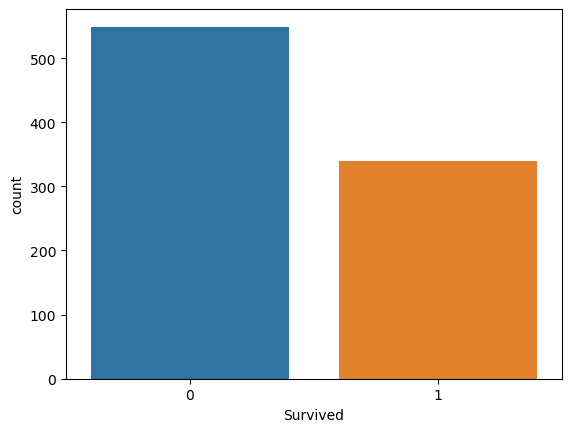

In [14]:
ax =sns.countplot(x="Survived",data =df)
print(df["Survived"].value_counts())

3    491
1    214
2    184
Name: Pclass, dtype: int64


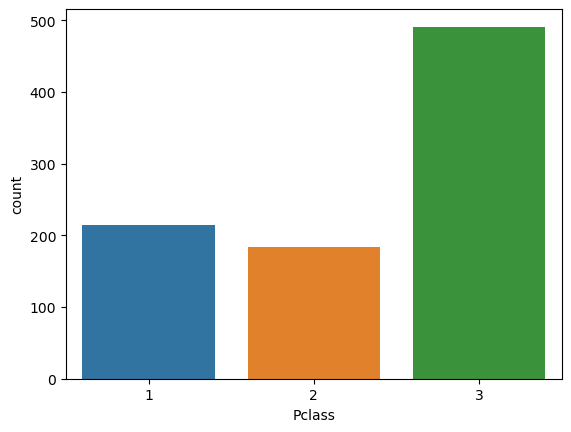

In [15]:
ax =sns.countplot(x="Pclass",data =df)
print(df["Pclass"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


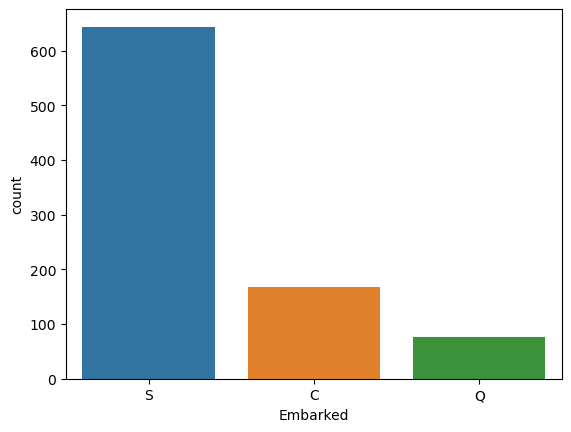

In [16]:
ax =sns.countplot(x="Embarked",data =df)
print(df["Embarked"].value_counts())

In [17]:
df['Sex'] = df.Sex.map({'female':0,'male':1})

In [18]:
dumm = pd.get_dummies(df['Embarked'],drop_first = False)
dumm

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [19]:
df =df.join(dumm)

In [20]:
df = df.drop(["Embarked"],axis=1)

In [21]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,0,0,1
885,1,1,0,19.0,0,0,30.0000,0,0,1
886,0,3,0,NaN,1,2,23.4500,0,0,1
887,1,1,1,26.0,0,0,30.0000,1,0,0


In [22]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.000000,0,0,13.0000,0,0,1
885,1,1,0,19.000000,0,0,30.0000,0,0,1
886,0,3,0,29.642093,1,2,23.4500,0,0,1
887,1,1,1,26.000000,0,0,30.0000,1,0,0


In [24]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

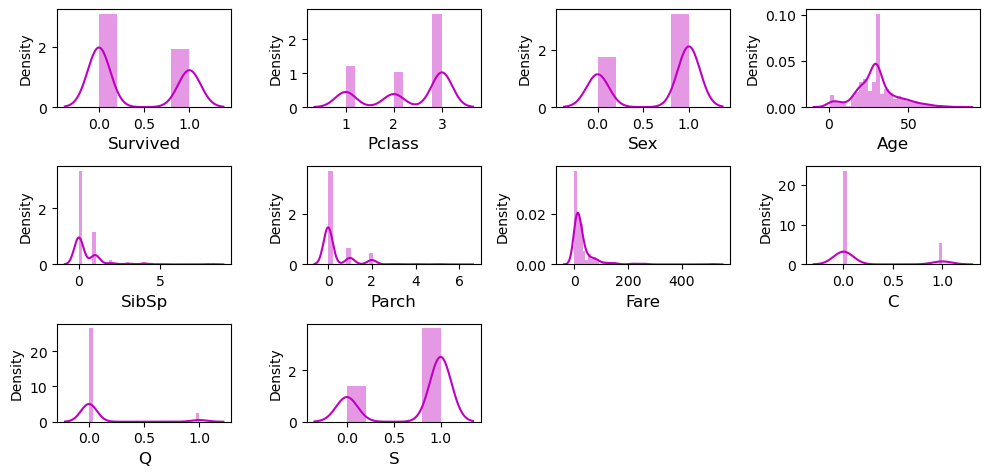

In [25]:
plt.figure(figsize=(10,6),facecolor="white")
plotnumer =1
for col in df:
    if plotnumer<=10:
        ax =plt.subplot(4,4,plotnumer)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize =12)
        plt.yticks(rotation =0,fontsize =10)
    plotnumer+=1
plt.tight_layout()    

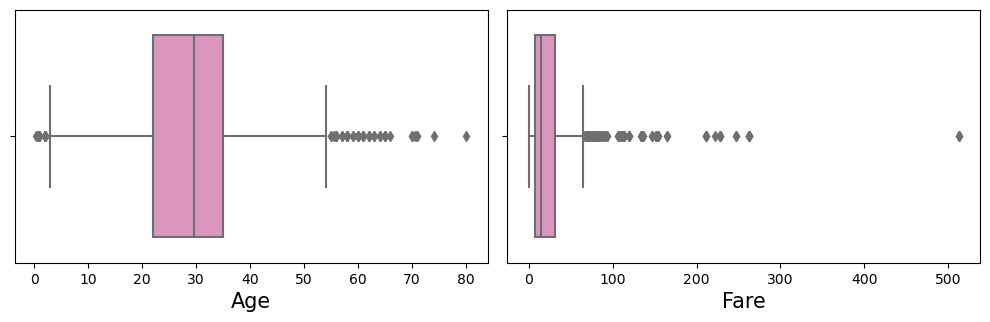

In [26]:
plt.figure(figsize=(10,6),facecolor ='white')
plotnumer =1
column = ["Age","Fare"]
for col in column:
    if plotnumer<=2:
        ax =plt.subplot(2,2,plotnumer)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=10)
    plotnumer+=1
plt.tight_layout()    
    


In [27]:
from scipy.stats import zscore
out_features =df[['Age','Fare']]
z =np.abs(zscore(out_features))
z

,Age,Fare
0,5.896199e-01,0.500240
1,6.448480e-01,0.788947
2,2.810029e-01,0.486650
3,4.133853e-01,0.422861
4,4.133853e-01,0.484133
...,...,...
884,2.038487e-01,0.384475
885,8.210826e-01,0.042213
886,5.482138e-16,0.174084
887,2.810029e-01,0.042213


In [28]:
drop_index =np.where(z>3)
drop_index[0]

array([ 27,  87,  95, 115, 117, 257, 298, 310, 340, 376, 379, 437, 492,
       526, 556, 629, 671, 678, 688, 699, 715, 729, 736, 741, 744, 778,
       849], dtype=int64)

In [29]:
out_features.shape

(889, 2)

In [30]:
df.drop(drop_index[0],inplace = True)

In [31]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [32]:
df.skew()

Survived    0.508351
Pclass     -0.715372
Sex        -0.639189
Age         0.234770
SibSp       3.747283
Parch       2.836258
Fare        2.279424
C           1.680697
Q           2.910027
S          -1.056235
dtype: float64

In [33]:
df["SibSp"] =np.cbrt(df["SibSp"])
df["Parch"] =np.cbrt(df["Parch"])
df["Fare"] =np.cbrt(df["Fare"])

In [34]:
df.skew()

Survived    0.508351
Pclass     -0.715372
Sex        -0.639189
Age         0.234770
SibSp       1.030472
Parch       1.395699
Fare        0.625048
C           1.680697
Q           2.910027
S          -1.056235
dtype: float64

In [39]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 0.7994893 ,  0.73062154, -0.58368269, ..., -0.4663841 ,
        -0.31095355,  0.60326118],
       [-1.64868042, -1.36869768,  0.70207119, ...,  2.14415545,
        -0.31095355, -1.65765681],
       [ 0.7994893 , -1.36869768, -0.26224422, ..., -0.4663841 ,
        -0.31095355,  0.60326118],
       ...,
       [ 0.7994893 , -1.36869768,  0.03043296, ..., -0.4663841 ,
        -0.31095355,  0.60326118],
       [-1.64868042,  0.73062154, -0.26224422, ...,  2.14415545,
        -0.31095355, -1.65765681],
       [ 0.7994893 ,  0.73062154,  0.21991349, ..., -0.4663841 ,
         3.21591437, -1.65765681]])

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, random_state = i,stratify = y)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8619402985074627 on random_state: 16
